In [151]:
import numpy
import matplotlib.pyplot
import pandas
hatchData = pandas.read_csv("HatchData.csv")
hatchData.drop(hatchData.columns[[0,1,4,5,8,9,10]], axis=1, inplace=True)
hatchData.rename(columns = {'Message_Temp.1' : 'Message_Humid'}, inplace=True)
hatchData

Humidity_Data  Temperature_Data Message_Temp Message_Humid
0              83.8              28.5     Too cold          Well
1              86.0              29.9     Too cold          Well
2              82.1              30.9     Too cold          Well
3              77.6              31.5     Too cold          Well
4              73.9              31.9     Too cold          Well
...             ...               ...          ...           ...
3605           82.9              28.1     Too cold          Well
3606           82.9              28.1     Too cold          Well
3607           82.9              28.1     Too cold          Well
3608           83.0              28.1     Too cold          Well
3609           83.0              28.1     Too cold          Well

[3610 rows x 4 columns]

In [152]:
from urllib.request import urlopen
import urllib.request
import json

url = "https://eggincubator-825e1-default-rtdb.firebaseio.com/.json"
response = urlopen(url)
jsonData = json.loads(response.read())

humid_data = jsonData["Humidity"]
temp_data = jsonData["Temperature"]

success = [0] * 3610
for i in range(3610):
    if hatchData.iloc[i]['Message_Temp'] == 'Moderate' and hatchData.iloc[i]['Message_Humid'] == 'Well':
        success[i] = 1
    else:
        success[i] = 0
hatchData['Success'] = success
hatchData.iloc[125:150]

Humidity_Data  Temperature_Data Message_Temp Message_Humid  Success
125           50.5              37.7     Moderate          Well        1
126           51.1              37.5     Moderate          Well        1
127           51.9              38.6     Moderate          Well        1
128           53.3              40.1     Moderate          Well        1
129           53.0              39.8     Moderate          Well        1
130           49.0              39.2     Moderate       Too dry        0
131           48.3              38.5     Moderate       Too dry        0
132           48.7              37.9     Moderate       Too dry        0
133           49.6              38.7     Moderate       Too dry        0
134           51.1              39.6     Moderate          Well        1
135           51.5              38.3     Moderate          Well        1
136           47.9              37.9     Moderate       Too dry        0
137           48.7              39.1     Moderate       Too dry        0
138           50.2              40.4     Moderate          Well        1
139           50.0              40.1     Moderate          Well        1
140           46.5              40.8     Moderate       Too dry        0
141           46.3              39.1     Moderate       Too dry        0
142           50.1              38.5     Moderate          Well        1
143           45.9              39.2     Moderate       Too dry        0
144           46.6              40.5     Moderate       Too dry        0
145           48.0              41.1      Too hot       Too dry        0
146           48.5              41.0      Too hot       Too dry        0
147           47.2              40.3     Moderate       Too dry        0
148           45.4              39.5     Moderate       Too dry        0
149           44.6              38.7     Moderate       Too dry        0

In [153]:
from sklearn.model_selection import train_test_split
x = dataset[['Temperature_Data', 'Humidity_Data']].values
y = dataset['Success'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print(x_train)
print(x_test)

[[ 28.3  86.7]
 [ 39.1  46.3]
 [ 37.7  43.7]
 ...
 [ 39.6  44.4]
 [ 31.5  68.6]
 [ 27.9 100. ]]
[[31.4 68. ]
 [29.8 80.8]
 [39.7 45.6]
 ...
 [38.6 44.6]
 [39.2 44.3]
 [39.8 46. ]]


In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

hatchDT = DecisionTreeClassifier(criterion='gini', random_state=0)
hatchDT.fit(x_train, y_train)
y_pred = hatchDT.predict(x_test)
pandas.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Actual  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
...      ...        ...
1078       1          1
1079       0          0
1080       0          0
1081       0          0
1082       0          0

[1083 rows x 2 columns]

In [155]:
print (f"Accuracy: {accuracy_score(y_test, y_pred) * 100}%")
print(classification_report(y_test, y_pred))

Accuracy: 99.90766389658357%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      0.98      0.99        57

    accuracy                           1.00      1083
   macro avg       1.00      0.99      1.00      1083
weighted avg       1.00      1.00      1.00      1083



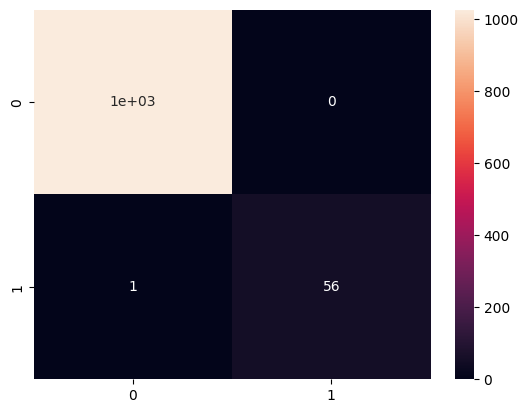

In [156]:
import seaborn
cm = confusion_matrix(y_test, y_pred)
seaborn.heatmap(cm, annot=True)
matplotlib.pyplot.show()

[Text(0.4, 0.8333333333333334, 'Humidity_Data <= 49.95\ngini = 0.107\nsamples = 2527\nvalue = [2384, 143]\nclass = Failed'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1261\nvalue = [1261, 0]\nclass = Failed'),
 Text(0.6, 0.5, 'Temperature_Data <= 34.1\ngini = 0.2\nsamples = 1266\nvalue = [1123, 143]\nclass = Failed'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1123\nvalue = [1123, 0]\nclass = Failed'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 143\nvalue = [0, 143]\nclass = Success')]

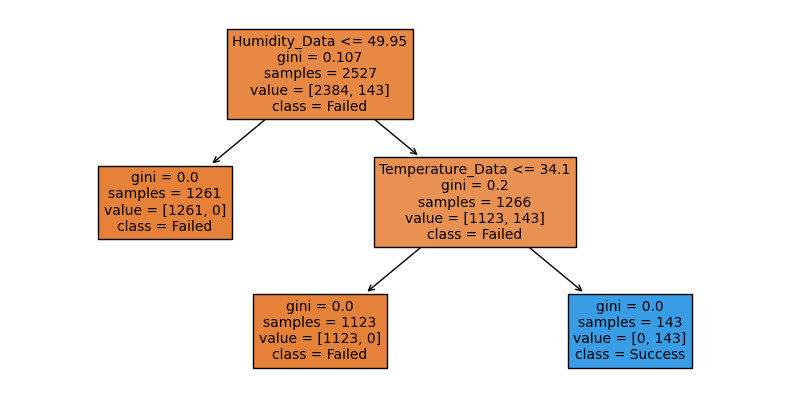

In [157]:
from sklearn.tree import plot_tree
matplotlib.pyplot.figure(figsize=(10,5))
plot_tree(hatchDT), feature_names = ['Temperature_Data', 'Humidity_Data'], class_names = ['Failed','Success'], filled=True, fontsize=10)

In [158]:
print(temp_data)
print(humid_data)
pred = hatchDT.predict([[temp_data,humid_data]])
print(pred[0])

36.7
51.4
1
